### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




In [ ]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score, RocCurveDisplay,\
confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import PredefinedSplit, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier, XGBRegressor, plot_importance

pd.set_option('display.max_columns', None)

In [ ]:
import pickle

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# This is the final engineered dataframe, which was used for decision tree 2 and random forest 2. It can be found later in the notebook.
df_work1 = pd.read_csv("sailfort_employee_retention.csv")

In [ ]:
# Dataframe generated to provide an example of the relevant data to assess with predictive models.
main_variables = ['last_evaluation', 'number_project', 'tenure', 'work_accident', 'left', 'promotion_last_5years', 'salary', 'overworked']
df_work1[main_variables].head(2)

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,overworked
0,0.53,2,3,0,1,0,0,0
1,0.88,7,4,0,1,0,1,1


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   last_evaluation         11167 non-null  float64
 1   number_project          11167 non-null  int64  
 2   tenure                  11167 non-null  int64  
 3   work_accident           11167 non-null  int64  
 4   left                    11167 non-null  int64  
 5   promotion_last_5years   11167 non-null  int64  
 6   salary                  11167 non-null  int64  
 7   department_RandD        11167 non-null  int64  
 8   department_accounting   11167 non-null  int64  
 9   department_hr           11167 non-null  int64  
 10  department_management   11167 non-null  int64  
 11  department_marketing    11167 non-null  int64  
 12  department_product_mng  11167 non-null  int64  
 13  department_sales        11167 non-null  int64  
 14  department_support      11167 non-null

In [ ]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Display all column names
df0.columns = df0.columns.str.lower()

In [ ]:
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [ ]:
# Check for duplicates
df0.duplicated().sum()


3008

In [ ]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df0_no_dupe = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df0_no_dupe.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
print(df0.shape, df0_no_dupe.shape)

(14999, 10) (11991, 10)


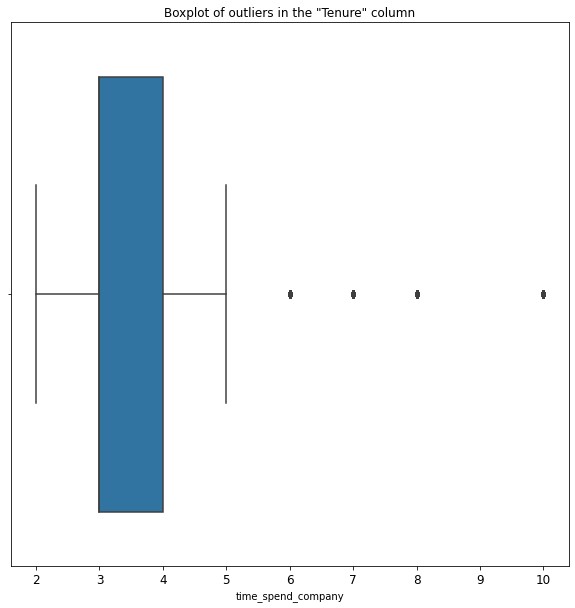

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize = (10,10))
plt.title('Boxplot of outliers in the "Tenure" column')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(df0_no_dupe['time_spend_company'])
plt.show()



In [ ]:
df1 = df0_no_dupe.rename(columns = {'time_spend_company' : 'tenure',
                         'average_montly_hours' : 'average_monthly_hours'})

In [ ]:
df1.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Determine the number of rows containing outliers
percentile_25 = df1['tenure'].quantile(0.25)
percentile_75 = df1['tenure'].quantile(0.75)
iqr = percentile_75 - percentile_25

upper_limit = percentile_75 + 1.5*iqr
lower_limit = percentile_25 - 1.5*iqr

outliers = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]

print('upper limit = ', upper_limit)
print('lower limit = ', lower_limit)
print('number of rows containing outliers:', len(outliers))



upper limit =  5.5
lower limit =  1.5
number of rows containing outliers: 824


💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




In [ ]:
# Get numbers of people who left vs. stayed
df1['left'].value_counts()

# Get percentages of people who left vs. stayed
percent_left = (df1['left'].mean())*100
percent_stayed = 100 - percent_left

print('percent who left: ', percent_left)
print('percent who stayed: ', percent_stayed)


percent who left:  16.604119756484028
percent who stayed:  83.39588024351598


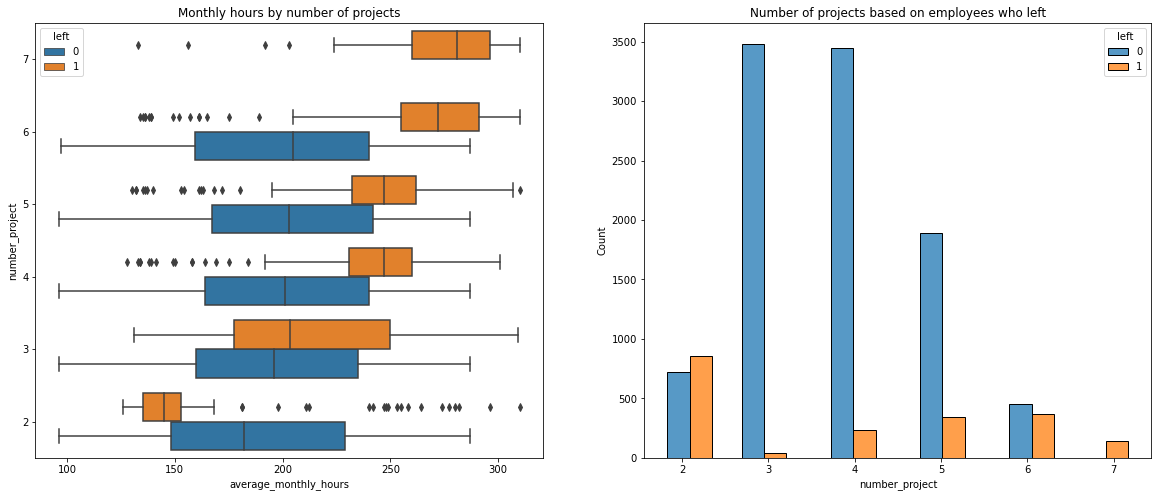

In [ ]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient = 'h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects')

sns.histplot(data = df1, x = 'number_project', hue = 'left', multiple = 'dodge', shrink = 3, ax = ax[1])
ax[1].set_title('Number of projects based on employees who left')

plt.show()

# In general, 3-4 projects appears to be a 'sweet spot', which maximizes employee retention (right figure).
# In most circumstances, any project number above 2 results in most employees working above a standard 40hr/week (left figure).

In [ ]:
# Confirming if all employees assigned seven projects did leave:

df1[df1['number_project'] == 7].value_counts().mean()

# A value of 1.0 here indidcates that 100% of employees in this specific category did leave.

1.0

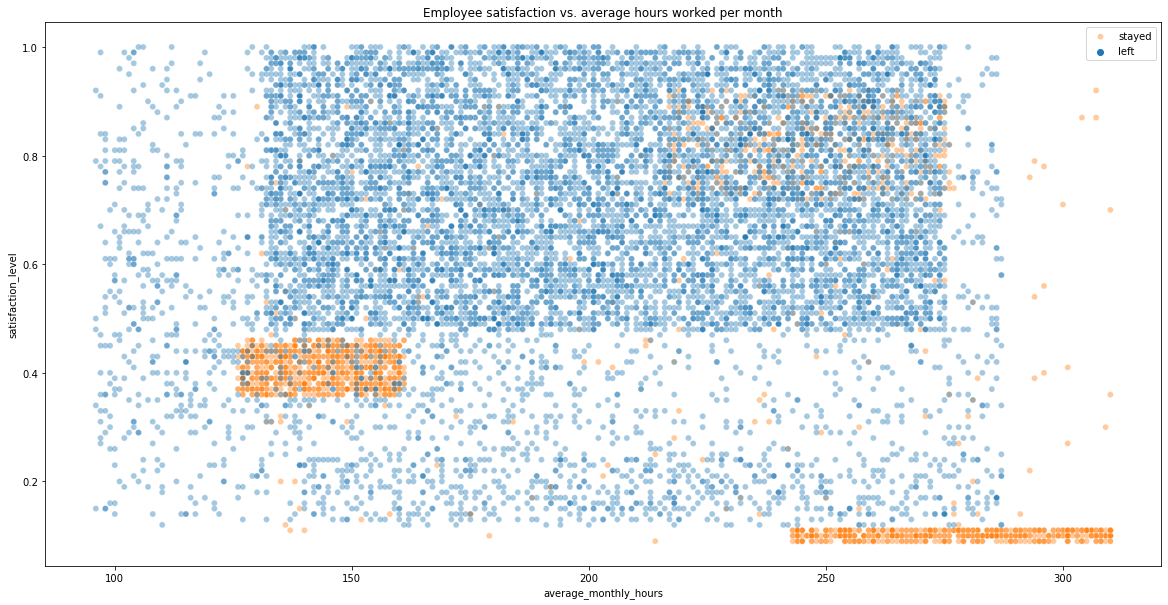

In [ ]:
# Create a plot as needed

plt.figure(figsize = (20,10))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.4)
plt.title('Employee satisfaction vs. average hours worked per month')
plt.legend(labels = ['stayed','left'])
plt.show()

# There are very distinct groups of employees who stayed/left. Very high average montly hours seems to be a strong predictor
# of how is likely to leave. There are additional clusters of employees who left with below national average working hours
# and low satisfaction scores, as well as high satisfaction employees who left with high monthly hours.

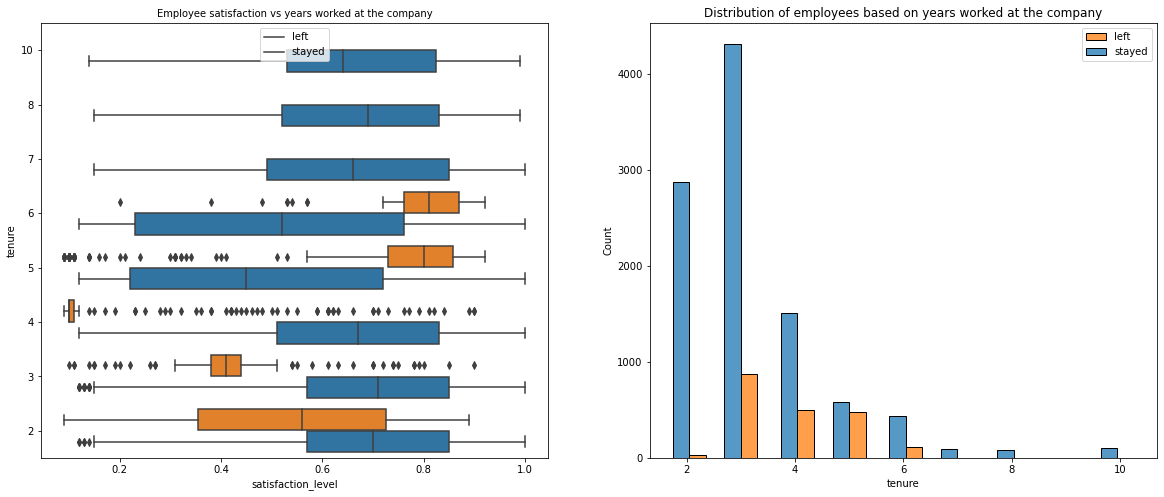

In [ ]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (20,8))

sns.boxplot(data = df1, x = 'satisfaction_level', y = 'tenure', hue = 'left', orient = 'h', ax = ax[0])
ax[0].set_title('Employee satisfaction vs years worked at the company', fontsize = 10)
ax[0].invert_yaxis()
ax[0].legend(labels = ['left','stayed'])

sns.histplot(data = df1, x = 'tenure', hue = 'left', multiple = 'dodge', shrink = 7, ax = ax[1])
ax[1].set_title('Distribution of employees based on years worked at the company')
ax[1].legend(labels = ['left','stayed'])
plt.show()


In [ ]:
mean_employee_left_satisfaction = df1.groupby(['left'])['satisfaction_level'].mean()
mean_employee_left_satisfaction

med_employee_left_satisfaction = df1.groupby(['left'])['satisfaction_level'].median()
med_employee_left_satisfaction

employee_satisfaction_data = {'mean_satisfaction' : mean_employee_left_satisfaction,
                             'median_satisfaction': med_employee_left_satisfaction}

satisfaction_table = pd.DataFrame(employee_satisfaction_data).reset_index()
satisfaction_table['left'] = satisfaction_table['left'].replace({1 : 'left', 0 : 'stayed'})
satisfaction_table.head()

# As expected, employees who stay have a higher mean and median statisfaction score compared to those who left.
# mean and median values differ slightly within each group, suggesting a possible skew of data. A normality test like the
# Shapiro-Wilk test could be performed to further assess if the mean is an appropriate metric to evaluate, if desired.

,left,mean_satisfaction,median_satisfaction
0,stayed,0.667365,0.69
1,left,0.440271,0.41


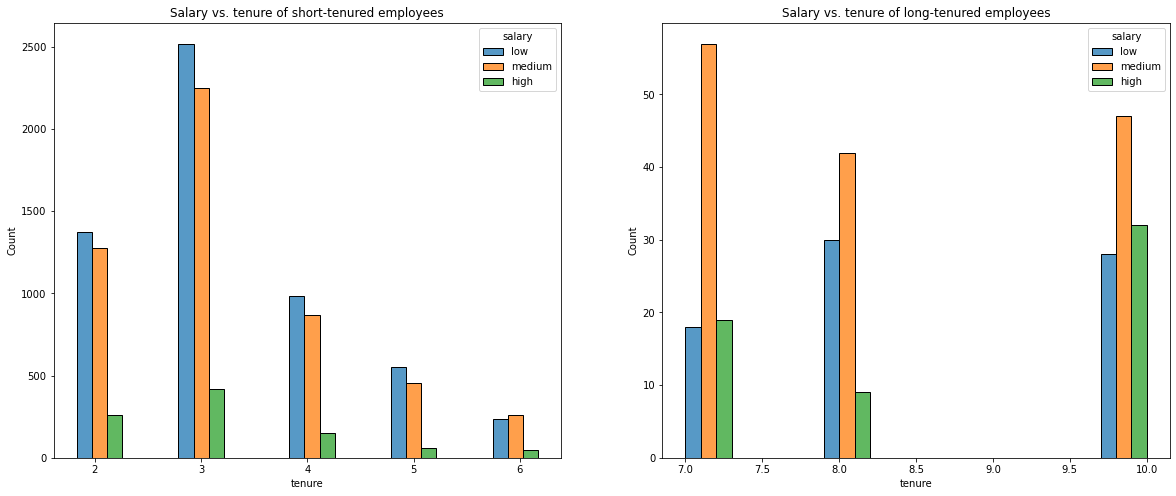

In [ ]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (20,8))

short_tenure = df1[df1['tenure'] <= 6]
long_tenure = df1[df1['tenure'] > 6]

sns.histplot(data = short_tenure, x = 'tenure', hue = 'salary', hue_order = ['low','medium','high'], multiple = 'dodge',
            shrink = 4.9, ax = ax[0])
ax[0].set_title('Salary vs. tenure of short-tenured employees')
sns.histplot(data = long_tenure, x = 'tenure', hue = 'salary', hue_order = ['low','medium','high'], multiple = 'dodge',
            shrink = 1, ax = ax[1])
ax[1].set_title('Salary vs. tenure of long-tenured employees')

plt.show()

# As tenure increases, the proportion of employees in the medium to high salary range increases.

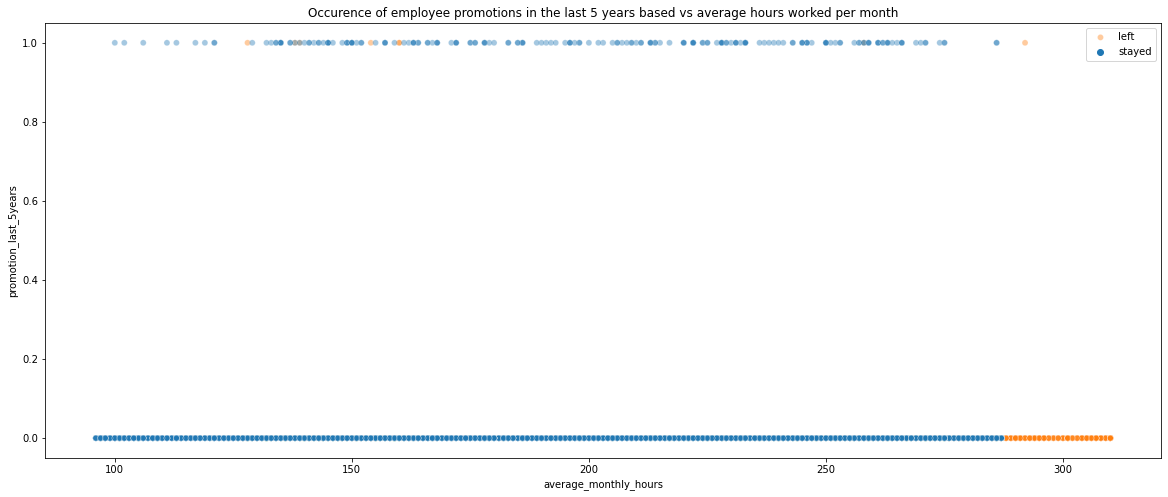

In [ ]:
# Create a plot as needed
plt.figure(figsize = (20,8))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left', alpha = 0.4)
plt.title('Occurence of employee promotions in the last 5 years based vs average hours worked per month')
plt.legend(labels = ['left','stayed'])
plt.show()


# A vast majority of employees who left worked the most monthly hours, and whether an employee was promoted or not doesn't
# appear to be positively correlated with average monthly work hours.

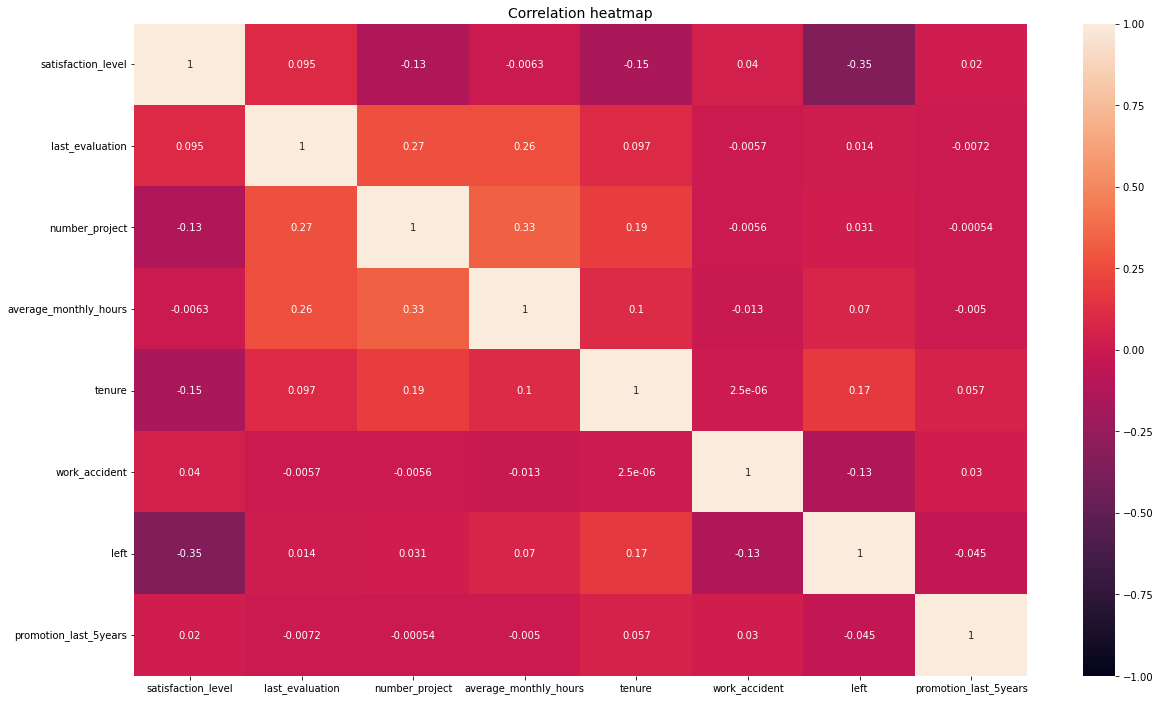

In [ ]:
# Create a plot as needed
plt.figure(figsize = (20,12))
sns.heatmap(data = df1.corr(), vmin = -1, vmax = 1, annot = True)
plt.title('Correlation heatmap', fontsize = 14)
plt.show()

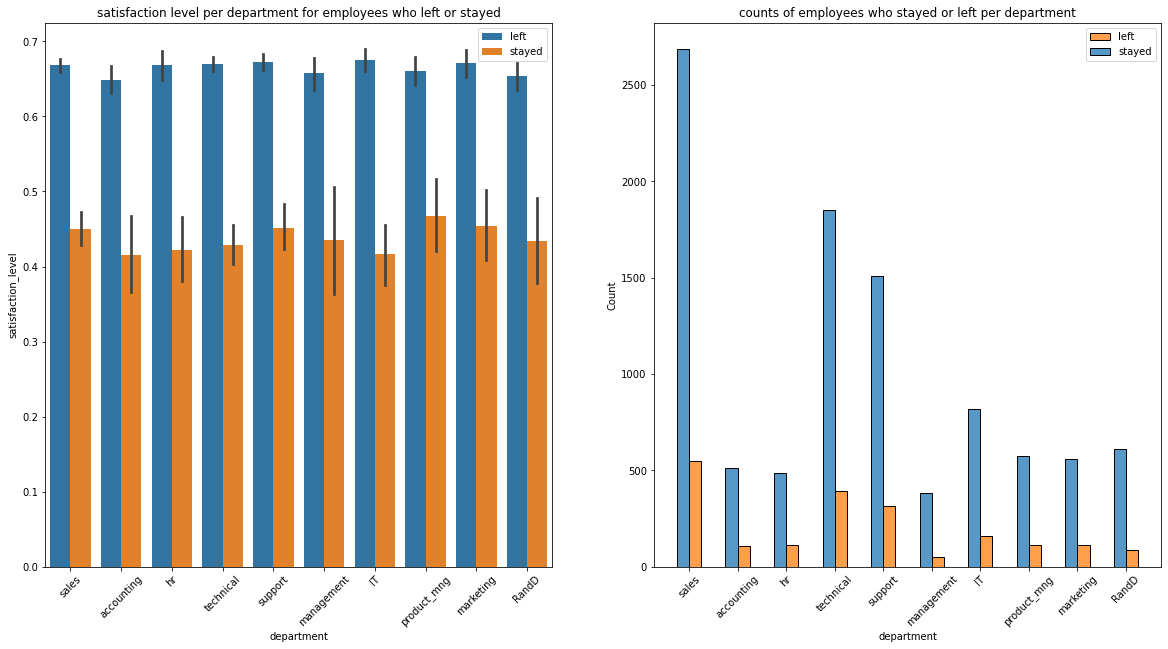

In [ ]:
# Create a plot as needed

fig, ax = plt.subplots(1, 2, figsize = (20,10))

sns.barplot(data = df1, x = 'department', y ='satisfaction_level', hue ='left', ax = ax[0])
ax[0].set_title('satisfaction level per department for employees who left or stayed')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, ['left','stayed'])
ax[0].tick_params(axis = 'x', rotation = 45)
sns.histplot(data = df1, x = 'department', hue = 'left', ax = ax[1], multiple = 'dodge', shrink = 0.5)
ax[1].set_title('counts of employees who stayed or left per department')
ax[1].legend(labels = ['left','stayed'])
ax[1].tick_params(axis = 'x', rotation = 45)
plt.show()

# Satisfaciton level does not differ between departments for employees who left/stayed. There also do not appear to be
# distinct departments with high/low retention proportions, although perhaps hr has a higher frequency of turnover.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
# Make a data frame based on the most well correlated variables to the 'left' variable.

correlates = df1.corr()['left']
print(correlates)

included = correlates[(correlates >= 0.2) | (correlates <= -0.2)].index
df2 = df1.loc[:, included]

satisfaction_level      -0.350558
last_evaluation          0.013520
number_project           0.030928
average_monthly_hours    0.070409
tenure                   0.173295
work_accident           -0.125436
left                     1.000000
promotion_last_5years   -0.044657
Name: left, dtype: float64


In [ ]:
df2.head()
# Scrap this idea, there are not enough predictors with strong enough correlations for an arbitrary threshold and it's already
# a low threshold.

,satisfaction_level,left
0,0.38,1
1,0.80,1
2,0.11,1
3,0.72,1
4,0.37,1


In [ ]:
# Logistic Regression First
# Make the salary column ordinal, not strictly nominal.

df3 = pd.get_dummies(data = df1, columns = ['department','salary'], drop_first = True)

df1_ord = df1.copy()
df1_ord['salary'] = (df1_ord['salary'].astype('category').cat.set_categories(['low', 'medium', 'high'])
                                                                            .cat.codes
                                                                            )
df1_ord = pd.get_dummies(data = df1_ord, columns = ['department'], drop_first = True)
df1_ord.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Use encoded dataframe to begin fitting a logistic regression model.
# Logistic Regression is SENSITIVE TO OUTLIERS. Remove them from the tenure column.

df1_lr = df1_ord[(df1_ord['tenure'] > lower_limit) & (df1_ord['tenure'] < upper_limit)]

In [ ]:
print(df1_ord['tenure'].value_counts(), df1_lr['tenure'].value_counts())

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: tenure, dtype: int64 3    5190
2    2910
4    2005
5    1062
Name: tenure, dtype: int64


In [ ]:
y = df1_lr['left']
X = df1_lr.copy()
X = df1_lr.drop('left', axis = 1)

In [ ]:
X.dtypes
y.dtypes

dtype('int64')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [ ]:
# I was getting an error when trying to fit this function, so I tried a different solver.
log_reg = LogisticRegression(random_state = 42, max_iter = 200, solver = 'liblinear')

In [ ]:
lr_model = log_reg.fit(X_train, y_train)

In [ ]:
lr_preds = lr_model.predict(X_test)

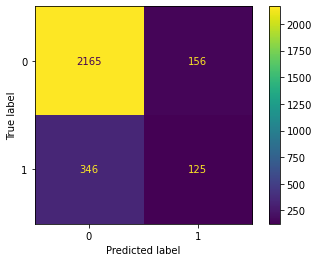

In [ ]:
lr_confmatr = confusion_matrix(y_test, lr_preds, labels = lr_model.classes_)
confmatr_disp = ConfusionMatrixDisplay(confusion_matrix = lr_confmatr, display_labels = lr_model.classes_)
confmatr_disp.plot(values_format = '')
plt.show()

In [ ]:
target_names = ['Predicted would not leave', 'Predicted would leave']
report = classification_report(y_true = y_test, y_pred = lr_preds, target_names = target_names)
print(report)

# Scores are reasonable for predicting when employees would not leave. However, the weighted average is lower. This is because
# the model is significantly less useful at predicting when employees WOULD leave. We should try another model.

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.27      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



In [ ]:
# Decision Tree

y = df1_lr['left']
X = df1_lr.copy()
X = df1_lr.drop('left', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)
d_tree = DecisionTreeClassifier(random_state = 42)

# Hyperparameters to use in GridSearchCV
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Evaluative metrics
metrics = {'f1','precision','recall','accuracy','roc_auc'}

tree1 = GridSearchCV(estimator = d_tree, param_grid = cv_params, scoring = metrics, refit = 'f1', cv = 4)

In [ ]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.84 s, sys: 0 ns, total: 2.84 s
Wall time: 2.84 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [ ]:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [ ]:
tree1.best_score_

0.944111091206062

In [ ]:
# A function to return a table of evaluative metrics for a predictive model. This will be used again.
def make_results(model_name:str, model_object, metric:str):

    metric_dict = {'auc':'mean_test_roc_auc',
                  'precision':'mean_test_precision',
                  'recall':'mean_test_recall',
                  'accuracy':'mean_test_accuracy',
                  'f1':'mean_test_f1'}

    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    auc = best_estimator_results.mean_test_roc_auc
    precision = best_estimator_results.mean_test_precision
    recall = best_estimator_results.mean_test_recall
    accuracy = best_estimator_results.mean_test_accuracy
    f1 = best_estimator_results.mean_test_f1

    table = pd.DataFrame({'model':[model_name],
                         'precision':[precision],
                         'recall':[recall],
                         'accuracy':[accuracy],
                         'f1':[f1],
                         'auc':[auc]
                         })
    return table

In [ ]:
decision_tree_results = make_results('tree1', tree1, 'f1')
decision_tree_results
# All metrics exclusively above 0.91 suggest this model is a good predictor. It will now be compared to a random forest model.

,model,precision,recall,accuracy,f1,auc
0,tree1,0.972927,0.917091,0.981732,0.944111,0.967871


In [ ]:
# Random Forest Model

randforest = RandomForestClassifier(random_state = 42)

# Ranodm Forest hyperparameter dictionary
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

metrics = {'f1','precision','recall','accuracy','roc_auc'}

rf = GridSearchCV(estimator = randforest, param_grid = cv_params, scoring = metrics, cv = 4, refit = 'f1')

In [ ]:
%%time

rf.fit(X_train, y_train)

CPU times: user 9min 9s, sys: 1.07 s, total: 9min 10s
Wall time: 9min 11s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
file_path = r"C:\Users\mattd\Desktop\Documents\python stuff"

In [ ]:
def write_pickle(path, model_object, save_as:str):


    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [ ]:
def read_pickle(path, saved_model_name:str):

    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [ ]:
write_pickle(file_path, rf, 'hr_rf')

In [ ]:
read_pickle(file_path, 'hr_rf')

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
print(rf.best_score_)
print()
print(rf.best_params_)

0.9501683014309092

{'max_depth': None, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}


In [ ]:
rf_cv_results = make_results('random forest', rf, 'f1')
rf_cv_results

,model,precision,recall,accuracy,f1,auc
0,random forest,0.990018,0.913547,0.983881,0.950168,0.975679


In [ ]:
rf_tree_table = pd.concat([decision_tree_results, rf_cv_results])
rf_tree_table
# The random forest outperforms the single decision tree in all metrics except recall, which is very close.

,model,precision,recall,accuracy,f1,auc
0,tree1,0.972927,0.917091,0.981732,0.944111,0.967871
0,random forest,0.990018,0.913547,0.983881,0.950168,0.975679


In [ ]:
def test_results(model_name:str, model_object, X_test_data, y_test_data):


    model_preds = model_object.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, model_preds)
    accuracy = accuracy_score(y_test_data, model_preds)
    precision = precision_score(y_test_data, model_preds)
    recall = recall_score(y_test_data, model_preds)
    f1 = f1_score(y_test_data, model_preds)

    table = pd.DataFrame({'model':[model_name],
                         'precision':[precision],
                         'recall':[recall],
                         'accuracy':[accuracy],
                         'f1':[f1],
                         'auc':[auc]
                         })
    return table

In [ ]:
forest_test_results = test_results('random forest', rf, X_test, y_test)
forest_test_results

# Test results suggest this model would perform well with new data.

,model,precision,recall,accuracy,f1,auc
0,random forest,0.993243,0.936306,0.988181,0.963934,0.967507


In [ ]:
# Steps will now be taken to assess if the selected variables are the most appropriate arrangement of predictors.
# 'average_monthly_hours' will be converted to binary, based on whether employees are 'overworked' or not. The
# threshold will be somewhat arbitrarily defined as 175 hours.
# 'satisfaction_level' will be removed as a predictor.

In [ ]:
df_ow = df1_lr.drop('satisfaction_level', axis = 1)

In [ ]:
df_ow['overworked'] = df_ow['average_monthly_hours']

In [ ]:
df_ow['overworked'] = (df_ow['overworked'] > 175).astype(int)
df_ow['overworked'].head(5)

0    0
2    1
3    1
4    0
5    0
Name: overworked, dtype: int64

In [ ]:
df_ow['overworked'].value_counts()

1    7062
0    4105
Name: overworked, dtype: int64

In [ ]:
df_work = df_ow.drop('average_monthly_hours', axis = 1)

In [ ]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   last_evaluation         11167 non-null  float64
 1   number_project          11167 non-null  int64  
 2   tenure                  11167 non-null  int64  
 3   work_accident           11167 non-null  int64  
 4   left                    11167 non-null  int64  
 5   promotion_last_5years   11167 non-null  int64  
 6   salary                  11167 non-null  int8   
 7   department_RandD        11167 non-null  uint8  
 8   department_accounting   11167 non-null  uint8  
 9   department_hr           11167 non-null  uint8  
 10  department_management   11167 non-null  uint8  
 11  department_marketing    11167 non-null  uint8  
 12  department_product_mng  11167 non-null  uint8  
 13  department_sales        11167 non-null  uint8  
 14  department_support      11167 non-null

In [ ]:
# Decison Tree 2

tree_updated = DecisionTreeClassifier(random_state = 42)

y = df_work1['left']
X = df_work1.copy()
X = df_work1.drop('left', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [ ]:
# Hyperparameters to use in GridSearchCV
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Evaluative metrics
metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

tree2 = GridSearchCV(estimator = tree_updated, param_grid = cv_params, scoring = metrics, refit = 'roc_auc', cv = 4)

In [ ]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 4.97 s, sys: 7.54 ms, total: 4.98 s
Wall time: 5.17 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
tree2.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
tree2.best_score_

np.float64(0.9617182856624548)

In [ ]:
decision_tree2_results = make_results('tree2', tree2, 'f1')

In [ ]:
decision_tree2_results

,model,precision,recall,accuracy,f1,auc
0,tree2,0.895752,0.904329,0.965971,0.899628,0.958103


In [ ]:
updated_table = pd.concat([rf_tree_table, decision_tree2_results])
updated_table

# As expected, all metrics scored more poorly on the second tree after removing the aforementioned predictor. The intention
# behind this, however, is to make the model more valid for the anticipated scenario of not having a strong 'satisfaction_level'
# data set, as well as it likely being colinear with attrition for an individual employee.

,model,precision,recall,accuracy,f1,auc
0,tree1,0.972927,0.917091,0.981732,0.944111,0.967871
0,random forest,0.990018,0.913547,0.983881,0.950168,0.975679
0,tree2,0.895752,0.904329,0.965971,0.899628,0.958103


In [ ]:
# Random forest 2

randforest2 = RandomForestClassifier(random_state = 42)

# Ranodm Forest hyperparameter dictionary
cv_params = {'max_depth': [3, None],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [1,3],
             'min_samples_split': [2,4],
             'n_estimators': [500],
             }

metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

rf2 = GridSearchCV(estimator = randforest2, param_grid = cv_params, scoring = metrics, cv = 4, refit = 'roc_auc')

In [ ]:
%%time
rf2.fit(X_train, y_train)

CPU times: user 2min 32s, sys: 321 ms, total: 2min 32s
Wall time: 2min 40s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4], 'n_estimators': [500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
write_pickle(file_path, rf2, 'hr_rf2')

In [ ]:
read_pickle(file_path, 'hr_rf2')

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4], 'n_estimators': [500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
rf2_results = make_results('rf2', rf2, 'auc')
rf2_results

,model,precision,recall,accuracy,f1,auc
0,rf2,0.915889,0.893705,0.968239,0.904579,0.965154


In [ ]:
rf2_tree2_table = pd.concat([decision_tree2_results, rf2_results])

In [ ]:
rf2_tree2_table = rf2_tree2_table.round(3)

In [ ]:
rf2_tree2_table

,model,precision,recall,accuracy,f1,auc
0,tree2,0.896,0.904,0.966,0.900,0.958
0,rf2,0.916,0.894,0.968,0.905,0.965


In [ ]:
rf_tree_final_table = pd.concat([updated_table, rf2_results])
rf_tree_final_table

# The updated random forest retains predictive efficacy much better than the updated decision tree, except for recall. Despite
# the lower recall value, F1 is greater, as is auc.

,model,precision,recall,accuracy,f1,auc
0,tree1,0.972927,0.917091,0.981732,0.944111,0.967871
0,random forest,0.990018,0.913547,0.983881,0.950168,0.975679
0,tree2,0.895752,0.904329,0.965971,0.899628,0.958103
0,rf2,0.918529,0.894414,0.968836,0.906243,0.966361


In [ ]:
# Testing the second decision tree on 'new' data

test_results('random forest 2', rf2, X_test, y_test)

,model,precision,recall,accuracy,f1,auc
0,random forest 2,0.912206,0.904459,0.969198,0.908316,0.943397


In [ ]:
# tree 2 Feature importances

tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                 columns = ['gini_importance'],
                                 index = X.columns)

tree2_importances = tree2_importances.sort_values(by = 'gini_importance', ascending = False)

tree2_importances

,gini_importance
tenure,0.310124
number_project,0.302657
last_evaluation,0.298038
overworked,0.085316
department_technical,0.002332
salary,0.000816
department_sales,0.000399
department_support,0.000263
work_accident,0.000055
promotion_last_5years,0.000000


In [ ]:
# random forest 2 importances

rf2_importances = pd.DataFrame(rf2.best_estimator_.feature_importances_,
                                 columns = ['gini_importance'],
                                 index = X.columns)

rf2_importances = rf2_importances.sort_values(by = 'gini_importance', ascending = False)

rf2_importances

,gini_importance
number_project,0.331516
last_evaluation,0.321477
tenure,0.221365
overworked,0.079102
salary,0.012721
work_accident,0.006678
department_sales,0.006661
department_technical,0.005880
department_support,0.004476
department_accounting,0.002031


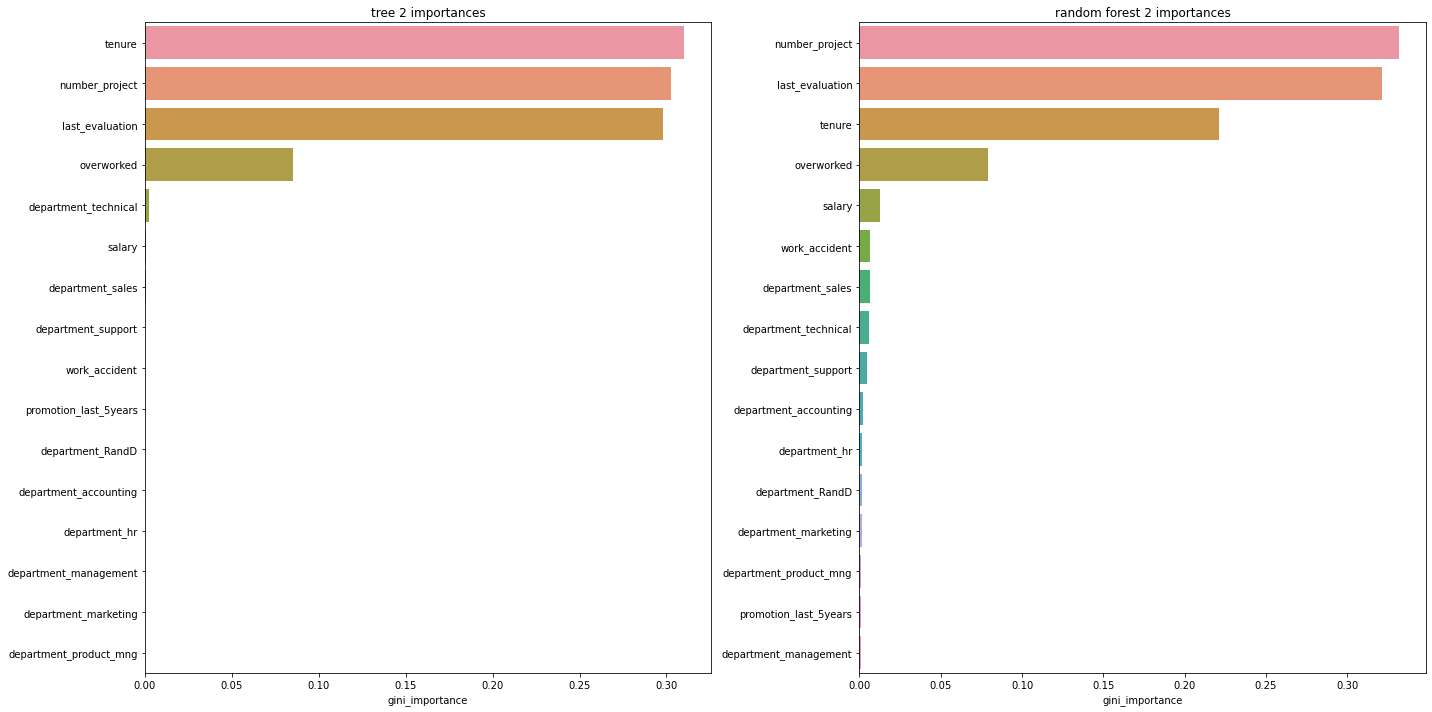

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20,10))

sns.barplot(data = tree2_importances, y = tree2_importances.index, x = 'gini_importance', ax = ax[0], orient = 'h')
ax[0].set_title('tree 2 importances')


sns.barplot(data = rf2_importances, y = rf2_importances.index, x = 'gini_importance', ax = ax[1], orient = 'h')
ax[1].set_title('random forest 2 importances')

plt.tight_layout()
plt.show()

# Both models obviously favor employees' tenure, number of projects, scores on their last evaluation, and whether they are
# overworked as defined by our threshold. Further consideration should be made to account for these metrics.

In [ ]:
!pip install shap

     |████████████████████████████████| 545 kB 33.3 MB/s            
     |████████████████████████████████| 53 kB 11.8 MB/s            
  Attempting uninstall: packaging
    Found existing installation: packaging 20.1
    Uninstalling packaging-20.1:
      Successfully uninstalled packaging-20.1
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
import shap

In [ ]:
rf2_best = rf2.best_estimator_

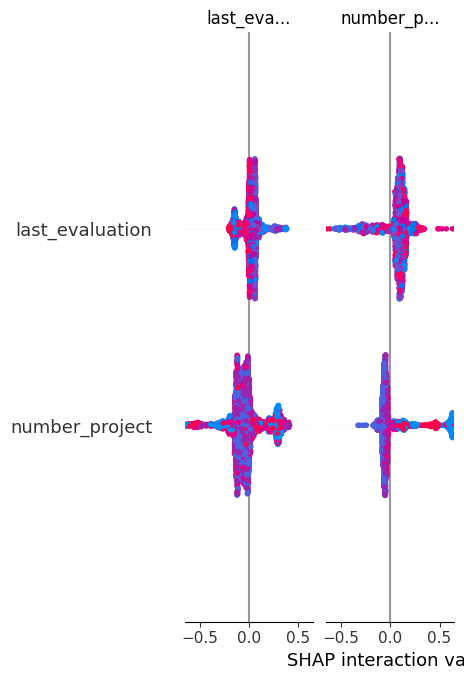

CPU times: user 1min 38s, sys: 254 ms, total: 1min 38s
Wall time: 1min 39s


In [ ]:
%%time
explainer = shap.TreeExplainer(model = rf2_best)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
import shap
shap.initjs()

best_rf = rf2_best  # your best estimator from GridSearchCV

# Use the same data for explanation and plotting (or a sample if you want)
X_explain = X_test  # or X_test.sample(500, random_state=42)

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_explain)

print(type(shap_values))
try:
    print("len(shap_values):", len(shap_values))
except TypeError:
    print("no len()")
print("X_explain.shape:", X_explain.shape)


<class 'numpy.ndarray'>
len(shap_values): 2792
X_explain.shape: (2792, 16)


In [ ]:
# Assessing if the first global importance plot looks the way it does due to the array structure.
shap_to_plot = shap_values

print("shap_to_plot.shape:", shap_to_plot.shape)


shap_to_plot.shape: (2792, 16, 2)


In [ ]:
explainer = shap.TreeExplainer(model = rf2_best)
shap_values = explainer.shap_values(X_test)
shap_values_left = shap_values[:,:,1]

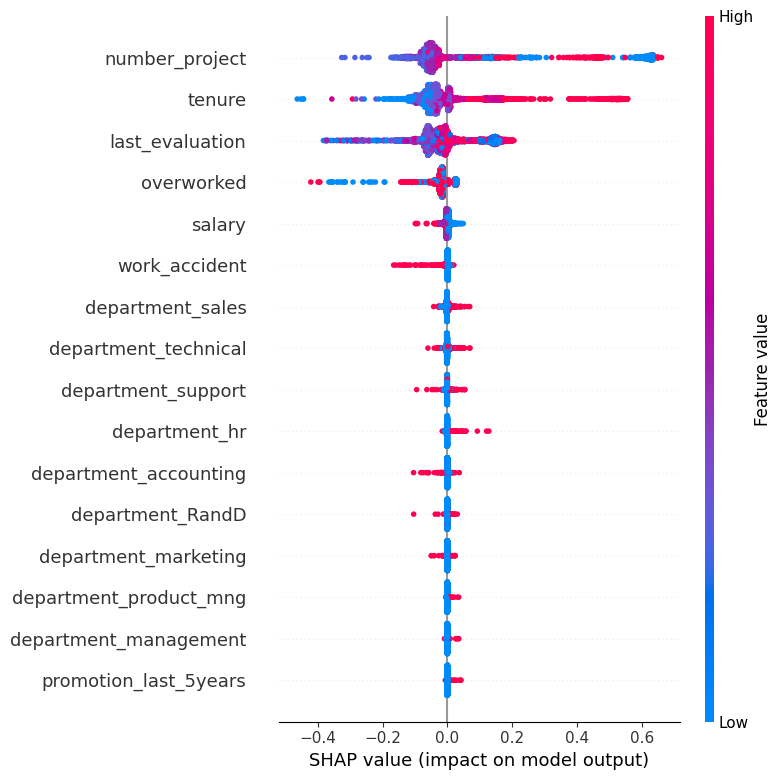

In [ ]:
explainer = shap.TreeExplainer(model = rf2_best)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values_left, X_test)

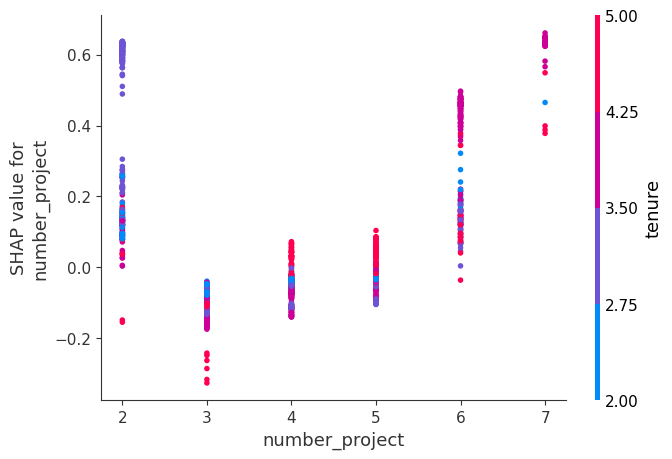

In [ ]:
shap.dependence_plot("number_project", shap_values_left, X_test)

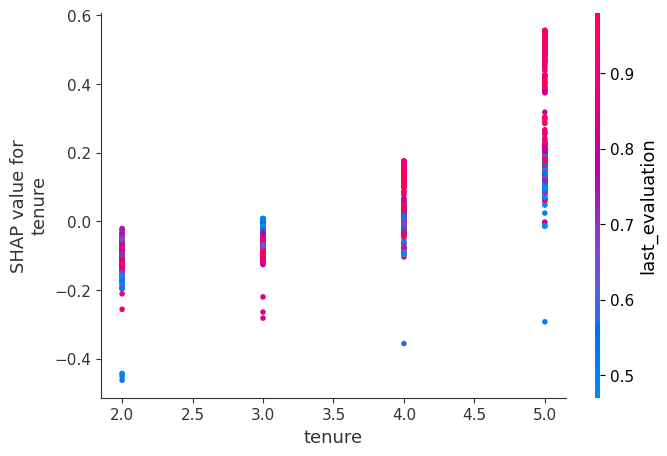

In [ ]:
shap.dependence_plot('tenure', shap_values_left, X_test)

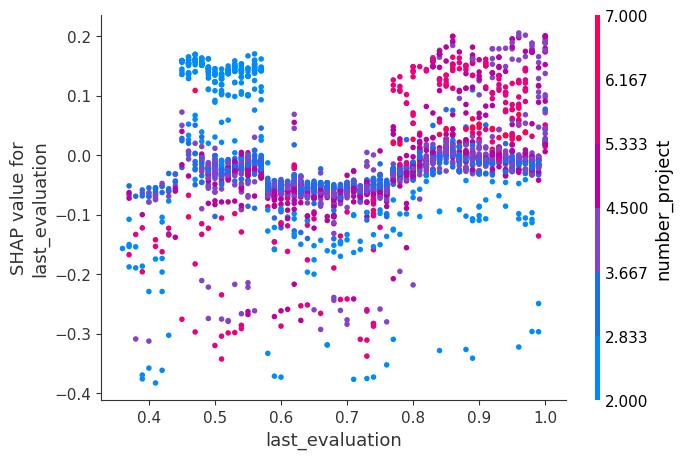

In [ ]:
shap.dependence_plot('last_evaluation', shap_values_left, X_test)

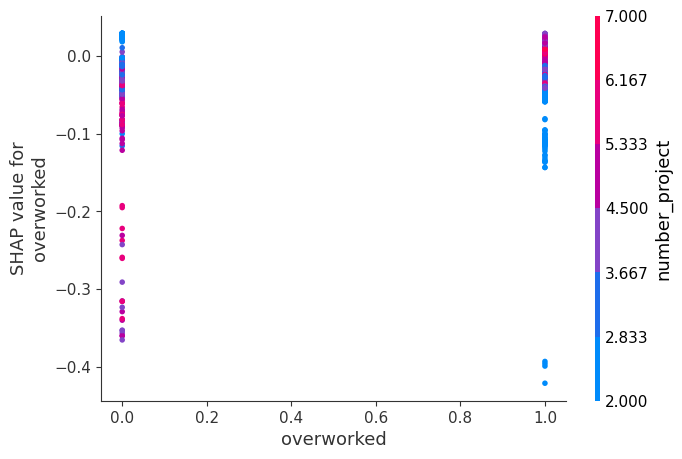

In [ ]:
shap.dependence_plot('overworked', shap_values_left, X_test)